In [4]:
import re
import os
import pandas as pd
import numpy as np

In [18]:
file = open("results/20NG_deepWalk_avg_4.txt",'r')
filestr = file.read()
print(filestr)
file.close()


Features shape:(11293, 4)
Accuracy in training set:0.24147702116355263
Macro:(0.19054882258557626, 0.23243028727321935, 0.17430888754238344, None)
Micro:(0.24147702116355263, 0.24147702116355263, 0.24147702116355263, None)
                          precision    recall  f1-score   support

             alt.atheism     0.1408    0.0625    0.0866       480
           comp.graphics     0.1587    0.1027    0.1247       584
 comp.os.ms-windows.misc     0.1675    0.1241    0.1426       572
comp.sys.ibm.pc.hardware     0.2299    0.5610    0.3261       590
   comp.sys.mac.hardware     0.1395    0.0104    0.0193       578
          comp.windows.x     0.2867    0.8398    0.4275       593
            misc.forsale     0.0778    0.0222    0.0346       585
               rec.autos     0.3629    0.2273    0.2795       594
         rec.motorcycles     0.1362    0.0535    0.0768       598
      rec.sport.baseball     0.1128    0.2161    0.1482       597
        rec.sport.hockey     0.4567    0.8967    

In [19]:
files = []
for file in os.listdir("results/"):
    if file.startswith("20NG_"):
        print(file)
        files.append(file)

20NG_deepWalk_avg_128.txt
20NG_deepWalk_avg_64.txt
20NG_deepWalk_avg_300.txt
20NG_line_avg_4.txt
20NG_line_avg_32.txt
20NG_deepWalk_avg_4.txt
20NG_line_avg_8.txt
20NG_node2vec_avg_300_0.3_1.0.txt
20NG_deepWalk_avg_256_1.0_1.0.txt
20NG_line_avg_256.txt
20NG_deepWalk_avg_32.txt
20NG_node2vec_avg_32_0.3_1.0.txt
20NG_line_avg_64.txt
20NG_line_avg_1024_1.0_1.0.txt
20NG_line_avg_300_1.0_1.0.txt
20NG_line_avg_256_1.0_1.0.txt
20NG_line_avg_300.txt
20NG_deepWalk_avg_8.txt
20NG_node2vec_avg_128_0.3_1.0.txt
20NG_node2vec_avg_1024_0.3_1.0.txt
20NG_line_avg_512.txt
20NG_deepWalk_avg_16.txt
20NG_line_avg_128.txt
20NG_line_avg_16.txt
20NG_node2vec_avg_64_0.3_1.0.txt
20NG_deepWalk_avg_300_1.0_1.0.txt
20NG_node2vec_avg_8_0.3_1.0.txt
20NG_node2vec_avg_4_0.3_1.0.txt
20NG_node2vec_avg_16_0.3_1.0.txt
20NG_deepWalk_avg_512.txt
20NG_line_avg_1024.txt
20NG_deepWalk_avg_256.txt
20NG_deepWalk_avg_512_1.0_1.0.txt
20NG_node2vec_avg_512_0.3_1.0.txt
20NG_line_avg_512_1.0_1.0.txt
20NG_deepWalk_avg_1024_1.0_1.0.txt
2

In [20]:
len(files)

38

In [17]:
matches = [re.search("_node2vec_avg_.*_(.*)_(.*).txt", file) for file in files]

p = [float(match.group(1)) if match != None else np.nan for match in matches]
q = [float(match.group(2)) if match != None else np.nan for match in matches]

matches = [re.search(".*?_(.*?)_.*.txt", file) for file in files]

method = [match.group(1) if match != None else np.nan for match in matches]

In [9]:
q

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.0,
 nan,
 nan,
 1.0,
 nan,
 1.0,
 nan,
 nan,
 nan,
 1.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.0,
 1.0,
 nan,
 nan,
 nan,
 nan,
 1.0,
 1.0,
 nan,
 1.0,
 nan,
 1.0,
 nan,
 1.0,
 1.0,
 nan,
 1.0,
 nan,
 nan,
 nan,
 1.0,
 nan,
 1.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.0,
 1.0]

In [10]:
pattern = r"Accuracy in testing set:(.*)\nMacro test:\(.*, .*, (.*), None\)\nMicro test:\(.*, .*, (.*), None\)"
pattern1 = r"Features shape:\(.*, (.*)\)"
matches = []
matches1 = []
for file in files:
    with open("results/"+file, 'r') as f:
        s = f.read()
        matches.append(re.search(pattern, s))
        matches1.append(re.search(pattern1, s))
                        
# we need to make sure that all matches and thus match!=None
acc = [float(match.group(1)) for match in matches]
macro_f1 = [float(match.group(2)) for match in matches]
micro_f1 = [float(match.group(3)) for match in matches]
emb_dim = [int(match.group(1)) for match in matches1]

In [11]:
pattern = r"Accuracy in training set:(.*)\nMacro:\(.*, .*, (.*), None\)\nMicro:\(.*, .*, (.*), None\)"

matches = []
for file in files:
    with open("results/"+file, 'r') as f:
        matches.append(re.search(pattern, f.read()))
train_acc = [float(match.group(1)) for match in matches]
train_macro_f1 = [float(match.group(2)) for match in matches]
train_micro_f1 = [float(match.group(3)) for match in matches]

In [ ]:
d = {"method":method, "emb_dim": emb_dim, "p":p, "q":q, "acc":acc, "macro_f1":macro_f1, "micro_f1":micro_f1, "train_acc":train_acc, "train_macro_f1":train_macro_f1, "train_micro_f1":train_micro_f1}
df = pd.DataFrame(d)
# df.p = np.log(df.p)+3
# df.q = np.log(df.q)+3

In [13]:
df[df.method == "node2vec"]

,acc,emb_dim,macro_f1,method,micro_f1,p,q,train_acc,train_macro_f1,train_micro_f1
7,0.777468,300,0.765886,node2vec,0.777468,0.3,1.0,0.896573,0.891179,0.896573
9,0.749967,125,0.735578,node2vec,0.749967,NaN,NaN,0.821748,0.810016,0.821748
10,0.816129,8192,0.806388,node2vec,0.816129,0.3,1.0,0.983530,0.982723,0.983530
12,0.772419,256,0.758705,node2vec,0.772419,1.0,1.0,0.880191,0.873017,0.880191
13,0.676365,32,0.653872,node2vec,0.676365,NaN,NaN,0.710174,0.688638,0.710174
15,0.590674,16,0.555744,node2vec,0.590674,NaN,NaN,0.604799,0.569172,0.604799
16,0.673708,32,0.650528,node2vec,0.673708,0.3,1.0,0.705924,0.683139,0.705924
22,0.221735,4,0.167358,node2vec,0.221735,NaN,NaN,0.223855,0.168951,0.223855
25,0.755414,128,0.741695,node2vec,0.755414,0.3,1.0,0.826795,0.816861,0.826795
26,0.804437,1024,0.794667,node2vec,0.804437,0.3,1.0,0.961126,0.959476,0.961126


In [27]:
df.describe()

,acc,emb_dim,macro_f1,micro_f1,p,q,train_acc,train_macro_f1,train_micro_f1
count,55.000000,55.000000,55.000000,55.000000,17.000000,17.0,55.000000,55.000000,55.000000
mean,0.683438,518.727273,0.661114,0.683438,0.464706,1.0,0.770358,0.752014,0.770358
std,0.169884,1234.377643,0.186778,0.169884,0.306066,0.0,0.216859,0.237733,0.216859
min,0.210974,4.000000,0.154245,0.210974,0.300000,1.0,0.217037,0.157682,0.217037
25%,0.670054,32.000000,0.641969,0.670054,0.300000,1.0,0.697733,0.671602,0.697733
50%,0.760595,256.000000,0.749676,0.760595,0.300000,1.0,0.874967,0.868259,0.874967
75%,0.778929,512.000000,0.766055,0.778929,0.300000,1.0,0.924112,0.920847,0.924112
max,0.818387,8192.000000,0.808875,0.818387,1.000000,1.0,0.984504,0.983727,0.984504


In [28]:
df['micro_f1'].argmax()

/home/sunxiaoyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


47

In [29]:
df.sort_values(by=['macro_f1'], ascending=False).head(3)

,acc,emb_dim,macro_f1,method,micro_f1,p,q,train_acc,train_macro_f1,train_micro_f1
47,0.818387,4096,0.808875,node2vec,0.818387,0.3,1.0,0.984504,0.983727,0.984504
53,0.816793,2048,0.807588,node2vec,0.816793,0.3,1.0,0.979633,0.978459,0.979633
10,0.816129,8192,0.806388,node2vec,0.816129,0.3,1.0,0.983530,0.982723,0.983530


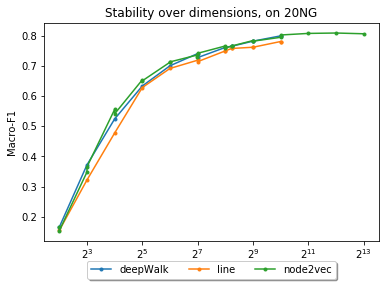

In [32]:
import matplotlib.pyplot as plt
methods = ['deepWalk', 'line', 'node2vec']
for method in methods:
    series = df[df.method==method].sort_values(by=['emb_dim'])
#     print(series)
    plt.plot(series.emb_dim,series.macro_f1,'.-', label=method)
# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize='x-small')
# plt.rc('ytick', labelsize='x-small')
plt.title("Stability over dimensions, on 20NG")
plt.ylabel('Macro-F1')
plt.xlabel('embedding dimension')
plt.xscale("log",basex=2)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07),shadow=True, ncol=3)
plt.savefig('emb_dim_20NG.png', dpi=300)
plt.show()

In [47]:
files = []
for file in os.listdir("results/"):
    if file.startswith("webkb_"):
        print(file)
        files.append(file)

len(files)

webkb_deepWalk_avg_16_0.3_1.0.txt
webkb_deepWalk_avg_8_0.3_1.0.txt
webkb_deepWalk_avg_300_0.3_1.0.txt
webkb_node2vec_avg_32_0.3_1.0.txt
webkb_deepWalk_avg_256_0.3_1.0.txt
webkb_deepWalk_avg_128_0.3_1.0.txt
webkb_node2vec_avg_512_0.3_1.0.txt
webkb_node2vec_avg_7168_0.3_1.0.txt
webkb_line_avg_300_0.3_1.0.txt
webkb_deepWalk_avg_7168_0.3_1.0.txt
webkb_node2vec_avg_300_0.3_1.0.txt
webkb_line_avg_32_0.3_1.0.txt
webkb_line_avg_256_0.3_1.0.txt
webkb_node2vec_avg_64_0.3_1.0.txt
webkb_node2vec_avg_8_0.3_1.0.txt
webkb_deepWalk_avg_32_0.3_1.0.txt
webkb_line_avg_64_0.3_1.0.txt
webkb_line_avg_512_0.3_1.0.txt
webkb_line_avg_128_0.3_1.0.txt
webkb_node2vec_avg_256_0.3_1.0.txt
webkb_line_avg_16_0.3_1.0.txt
webkb_deepWalk_avg_1024_0.3_1.0.txt
webkb_deepWalk_avg_512_0.3_1.0.txt
webkb_deepWalk_avg_64_0.3_1.0.txt
webkb_node2vec_avg_4_0.3_1.0.txt
webkb_node2vec_avg_128_0.3_1.0.txt
webkb_node2vec_avg_1024_0.3_1.0.txt
webkb_line_avg_4_0.3_1.0.txt
webkb_line_avg_8_0.3_1.0.txt
webkb_deepWalk_avg_4_0.3_1.0.txt
we

33

In [48]:
matches = [re.search("_node2vec_.*_(.*)_(.*).txt", file) for file in files]

p = [float(match.group(1)) if match != None else np.nan for match in matches]
q = [float(match.group(2)) if match != None else np.nan for match in matches]

matches = [re.search(".*?_(.*?)_.*.txt", file) for file in files]

method = [match.group(1) if match != None else np.nan for match in matches]

pattern = r"Accuracy in training set:(.*)\nMacro:\(.*, .*, (.*), None\)\nMicro:\(.*, .*, (.*), None\)"

matches = []
for file in files:
    with open("results/"+file, 'r') as f:
        matches.append(re.search(pattern, f.read()))
train_acc = [float(match.group(1)) for match in matches]
train_macro_f1 = [float(match.group(2)) for match in matches]
train_micro_f1 = [float(match.group(3)) for match in matches]

pattern = r"Accuracy in testing set:(.*)\nMacro test:\(.*, .*, (.*), None\)\nMicro test:\(.*, .*, (.*), None\)"
pattern1 = r"Features shape:\(.*, (.*)\)"
matches = []
matches1 = []
for file in files:
    with open("results/"+file, 'r') as f:
        s = f.read()
        matches.append(re.search(pattern, s))
        matches1.append(re.search(pattern1, s))
                        
# we need to make sure that all matches and thus match!=None
acc = [float(match.group(1)) for match in matches]
macro_f1 = [float(match.group(2)) for match in matches]
micro_f1 = [float(match.group(3)) for match in matches]
emb_dim = [int(match.group(1)) for match in matches1]

d = {"method":method, "emb_dim": emb_dim, "p":p, "q":q, "acc":acc, "macro_f1":macro_f1, "micro_f1":micro_f1, "train_acc":train_acc, "train_macro_f1":train_macro_f1, "train_micro_f1":train_micro_f1}
df = pd.DataFrame(d)
# df.p = np.log(df.p)+3
# df.q = np.log(df.q)+3
df

,acc,emb_dim,macro_f1,method,micro_f1,p,q,train_acc,train_macro_f1,train_micro_f1
0,0.771490,16,0.729399,deepWalk,0.771490,NaN,NaN,0.773100,0.743548,0.773100
1,0.749284,8,0.702431,deepWalk,0.749284,NaN,NaN,0.735284,0.693269,0.735284
2,0.862464,300,0.846342,deepWalk,0.862464,NaN,NaN,0.910096,0.902747,0.910096
3,0.815186,32,0.787343,node2vec,0.815186,0.3,1.0,0.823403,0.799064,0.823403
4,0.858883,256,0.840676,deepWalk,0.858883,NaN,NaN,0.903675,0.895913,0.903675
5,0.846705,128,0.826856,deepWalk,0.846705,NaN,NaN,0.881912,0.870505,0.881912
6,0.883238,512,0.873451,node2vec,0.883238,0.3,1.0,0.931859,0.927261,0.931859
7,0.889685,7168,0.878862,node2vec,0.889685,0.3,1.0,0.942918,0.939355,0.942918
8,0.877507,300,0.869798,line,0.877507,NaN,NaN,0.914377,0.909559,0.914377
9,0.883238,7168,0.872852,deepWalk,0.883238,NaN,NaN,0.958259,0.955951,0.958259


/home/sunxiaoyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  This is separate from the ipykernel package so we can avoid doing imports until


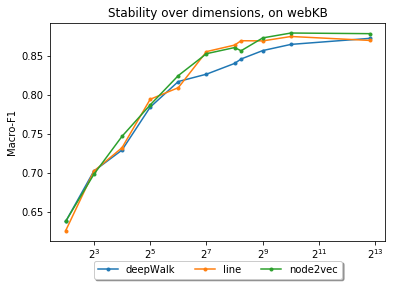

In [51]:
df.describe()

df['micro_f1'].argmax()

df.sort_values(by=['macro_f1'], ascending=False).head(3)

import matplotlib.pyplot as plt
methods = ['deepWalk', 'line', 'node2vec']
for method in methods:
    series = df[df.method==method].sort_values(by=['emb_dim'])
#     print(series)
    plt.plot(series.emb_dim,series.macro_f1,'.-', label=method)
# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize='x-small')
# plt.rc('ytick', labelsize='x-small')
plt.title("Stability over dimensions, on webKB")
plt.ylabel('Macro-F1')
plt.xlabel('embedding dimension')
plt.xscale("log",basex=2)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07),shadow=True, ncol=3)
plt.savefig('emb_dim_webkb.png', dpi=300)
plt.show()

In [40]:
df[df["method"]=="node2vec"]

,acc,emb_dim,macro_f1,method,micro_f1,p,q,train_acc,train_macro_f1,train_micro_f1
2,0.851003,128,0.838276,node2vec,0.851003,0.1,10.0,0.877988,0.865553,0.877988
3,0.852436,128,0.837789,node2vec,0.852436,10.0,0.1,0.880128,0.868331,0.880128
5,0.868911,128,0.856146,node2vec,0.868911,10.0,3.0,0.878345,0.866617,0.878345
6,0.858883,128,0.844541,node2vec,0.858883,0.1,1.0,0.885480,0.875186,0.885480
7,0.858883,128,0.841928,node2vec,0.858883,0.1,0.1,0.872636,0.859913,0.872636
8,0.815186,32,0.787343,node2vec,0.815186,0.3,1.0,0.823403,0.799064,0.823403
11,0.848854,128,0.831060,node2vec,0.848854,3.0,10.0,0.872636,0.860819,0.872636
12,0.840974,128,0.819245,node2vec,0.840974,3.0,1.0,0.881199,0.868710,0.881199
13,0.856017,128,0.846072,node2vec,0.856017,0.3,3.0,0.895469,0.889562,0.895469
14,0.883238,512,0.873451,node2vec,0.883238,0.3,1.0,0.931859,0.927261,0.931859


In [46]:
from math import isclose
df.drop(df[(df.method == 'node2vec') & (df.p0.3) | idclose(df.q, 1.0))].index)

TypeError: cannot convert the series to <class 'float'>

In [50]:
df

,acc,emb_dim,macro_f1,method,micro_f1,p,q,train_acc,train_macro_f1,train_micro_f1
0,0.771490,16,0.729399,deepWalk,0.771490,NaN,NaN,0.773100,0.743548,0.773100
1,0.749284,8,0.702431,deepWalk,0.749284,NaN,NaN,0.735284,0.693269,0.735284
2,0.862464,300,0.846342,deepWalk,0.862464,NaN,NaN,0.910096,0.902747,0.910096
3,0.815186,32,0.787343,node2vec,0.815186,0.3,1.0,0.823403,0.799064,0.823403
4,0.858883,256,0.840676,deepWalk,0.858883,NaN,NaN,0.903675,0.895913,0.903675
5,0.846705,128,0.826856,deepWalk,0.846705,NaN,NaN,0.881912,0.870505,0.881912
6,0.883238,512,0.873451,node2vec,0.883238,0.3,1.0,0.931859,0.927261,0.931859
7,0.889685,7168,0.878862,node2vec,0.889685,0.3,1.0,0.942918,0.939355,0.942918
8,0.877507,300,0.869798,line,0.877507,NaN,NaN,0.914377,0.909559,0.914377
9,0.883238,7168,0.872852,deepWalk,0.883238,NaN,NaN,0.958259,0.955951,0.958259
